<a href="https://colab.research.google.com/github/dvguruprasad/colab-wip/blob/main/lda_async_interviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 44.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [12]:
!python3 -m spacy download en


2022-09-10 11:33:05.853702: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import csv 
import gensim
from gensim.models.phrases import Phrases
import nltk

with open('/content/bb-jds.txt') as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]
print(len(lines))

corpus = [gensim.utils.simple_preprocess(doc, deacc=True) for doc in lines]

# Build the bigram and trigram models
bigram = gensim.models.Phrases(corpus, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
for doc in corpus:
  print(trigram_mod[bigram_mod[doc]])

FileNotFoundError: ignored

In [2]:
import csv 
import gensim
from gensim.models.phrases import Phrases
import nltk


all_data=[]
with open('/content/query_result_2022-08-24T07_22_23.39294Z.csv', mode='r') as csv_file:
  csv_reader = csv.DictReader(csv_file)
  for row in csv_reader:
    all_data.append(row)
  all_data = all_data[1:]

all = [i['data'] for i in all_data]
not_recommended = [i['data'] for i in all_data if i['recommendation'] == 'Not Recommended']
recommended = [i['data'] for i in all_data if i['recommendation'] == 'Recommended']

corpus = [gensim.utils.simple_preprocess(doc, deacc=True) for doc in all]

print(corpus[0])

# nltk.download('averaged_perceptron_tagger')

# bigram = Phrases(corpus[3:], min_count=1, threshold=1)

['with', 'warehouse', 'management', 'systems', 'such', 'as', 'let', 'see', 'the', 'rf', 'scanners', 've', 'used', 'them', 'for', 'over', 'year', 've', 'had', 'plenty', 'of', 'experience', 've', 'been', 'trained', 'to', 'do', 'most', 'of', 'the', 'functions', 'on', 'them', 'other', 'than', 'like', 'some', 'of', 'the', 'more', 'complicated', 'ones', 'most', 'of', 'the', 'functions', 'our', 'church', 'was', 'trained', 'on', 'with', 'rf', 'scanner', 'were', 'moving', 'from', 'one', 'slide', 'to', 'another', 'and', 'or', 'cakey', 'in', 'receiving', 'items', 'and', 'moving', 'them', 'to', 'pallet', 'slots', 'or', 'inputting', 'from', 'palette', 'slot', 'to', 'pixel', 'lat', 'my', 'initiative', 'for', 'learning', 'something', 'new', 'was', 'the', 'simple', 'fact', 'of', 'anything', 'try', 'to', 'learn', 'something', 'new', 'to', 'me', 'look', 'at', 'it', 'and', 'think', 'about', 'what', 'can', 'use', 'it', 'for', 'in', 'the', 'future', 'such', 'as', 'customer', 'service', 'applications', 'of'

In [2]:
!pip install gensim numpy
import numpy

print(numpy.version.version)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.21.6


In [15]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import spacy

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

custom_stopwords = ['ve', 'like', 'let', 'going', 'went', 'try', 'called', 'got', 'stuff', 'want', 'things', 'sure', 'goes', 'tell', 'okay', 'ok',
 'wasn', 'yeah', 'hey','hi', 'um', 'couldn', 'didn', 'took', 'maybe', 'sure', 'thing', 'aren', 'weren', 'll', 'come', 'fucking', 'uh', 'ughh','know', 'able', 'way', 'use',
 'asap', 'fool','general', 'info', 'definitely', 'redo', 'break', 'guess', 'find', 'huge', 'eat', 'bring', 'guy', 'pee', 'sorry', 'damn', 'whoa', 'man', 'whatnot', 'usual', 
 'actually', 'say', 'bit', 'new', 'look', 'well', 'need', 'take', 'little', 'lot']

allowed_postags=['NN', 'JJ', 'VB', 'RB']

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def spacy_lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def preprocess(doc):
    doc_pos = nltk.pos_tag(doc)
    result = []
    for token, tag in doc_pos:
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in custom_stopwords and len(token) >= 2 and tag in allowed_postags:
            result.append(lemmatize_stemming(token))
    return result

def spacy_preprocess(doc):
    result = []
    for token in doc:
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in custom_stopwords and len(token) >= 2:
            result.append(token)
    return result

processed_docs = spacy_lemmatization([spacy_preprocess(doc) for doc in corpus])
print(len(processed_docs))
print(processed_docs[0][:20])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


2809
['warehouse', 'management', 'system', 'scanner', 'year', 'plenty', 'experience', 'train', 'function', 'complicated', 'one', 'function', 'church', 'train', 'scanner', 'move', 'slide', 'cakey', 'receive', 'item']


In [ ]:

def lemmatization(texts, allowed_postags=['NN', 'JJ', 'VB', 'RB']):
    texts_out = []
    for doc in texts:
        doc_pos = nltk.pos_tag(doc)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

sample = corpus[:10]
print([nltk.pos_tag(doc) for doc in corpus][0][:10])


In [4]:
doc_sample = corpus[0]
print('original document: ')
print(doc_sample)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

processed_docs = [preprocess(doc) for doc in corpus[3:]]
print(processed_docs[0])

original document: 
['with', 'warehouse', 'management', 'systems', 'such', 'as', 'let', 'see', 'the', 'rf', 'scanners', 've', 'used', 'them', 'for', 'over', 'year', 've', 'had', 'plenty', 'of', 'experience', 've', 'been', 'trained', 'to', 'do', 'most', 'of', 'the', 'functions', 'on', 'them', 'other', 'than', 'like', 'some', 'of', 'the', 'more', 'complicated', 'ones', 'most', 'of', 'the', 'functions', 'our', 'church', 'was', 'trained', 'on', 'with', 'rf', 'scanner', 'were', 'moving', 'from', 'one', 'slide', 'to', 'another', 'and', 'or', 'cakey', 'in', 'receiving', 'items', 'and', 'moving', 'them', 'to', 'pallet', 'slots', 'or', 'inputting', 'from', 'palette', 'slot', 'to', 'pixel', 'lat', 'my', 'initiative', 'for', 'learning', 'something', 'new', 'was', 'the', 'simple', 'fact', 'of', 'anything', 'try', 'to', 'learn', 'something', 'new', 'to', 'me', 'look', 'at', 'it', 'and', 'think', 'about', 'what', 'can', 'use', 'it', 'for', 'in', 'the', 'future', 'such', 'as', 'customer', 'service', 

In [16]:
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.items():
    print(k, dictionary[k])
    count += 1
    if count > 10:
        break
print(dictionary.num_docs)

0 action
1 application
2 apply
3 appropriate
4 arrive
5 ask
6 await
7 balance
8 base
9 buy
10 cakey
2809


In [21]:
from gensim.models import Word2Vec
import numpy as np

w2vec_model = Word2Vec(sentences=processed_docs, window=5, min_count=1, workers=4)


In [22]:
import numpy as np
from sklearn.preprocessing import minmax_scale

# id_to_w2v = [[i, model.wv[word]] for i, word in dictionary.items()]

# print(id_to_w2v[0])

def normalize_min_max(v):
  max = np.max(v)
  min = np.min(v)
  return (max - v) / (max - min)

def normalize(v):
  # return minmax_scale(v - np.std(v)) / np.mean(v)
  return minmax_scale(v, feature_range=(0, 1))


wv = [w2vec_model.wv[word] for i, word in dictionary.items()]
wv_transposed = np.array(wv).transpose()

print(wv_transposed.shape, len(dictionary))

w2vec_matrix = []
for row in wv_transposed:
  inner = []
  for i, col in enumerate(normalize(row)):
    inner.append((i, col))
  w2vec_matrix.append(inner)

w2vec_matrix_128 = np.array(w2vec_matrix, dtype=np.double)

print(f"w2vec cols: {len(w2vec_matrix)}, rows: {len(w2vec_matrix[0])}")
print(len(w2vec_matrix))
print(f"w2vec matrix: {w2vec_matrix[0][:10]}")
print(f"w2vec matrix: {w2vec_matrix[8][:10]}")

(100, 2445) 2445
w2vec cols: 100, rows: 2445
100
w2vec matrix: [(0, 0.44403926), (1, 0.49531758), (2, 0.30722395), (3, 0.49062532), (4, 0.43974835), (5, 0.40102595), (6, 0.5745575), (7, 0.14830276), (8, 0.26978093), (9, 0.6801487)]
w2vec matrix: [(0, 0.5813185), (1, 0.5350205), (2, 0.25810915), (3, 0.5861389), (4, 0.48036087), (5, 0.5267491), (6, 0.41122663), (7, 0.35994563), (8, 0.5041348), (9, 0.086959094)]


In [18]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(len(bow_corpus))

bow_doc_10 = bow_corpus[3]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                               dictionary[bow_doc_10[i][0]], bow_doc_10[i][1]))

2809
Word 6 ("base") appears 1 time.
Word 13 ("college") appears 1 time.
Word 25 ("equipment") appears 1 time.
Word 26 ("establish") appears 1 time.
Word 35 ("future") appears 2 time.
Word 45 ("late") appears 1 time.
Word 51 ("mean") appears 4 time.
Word 69 ("school") appears 1 time.
Word 78 ("team") appears 6 time.
Word 84 ("understand") appears 2 time.
Word 88 ("way") appears 1 time.
Word 97 ("bit") appears 1 time.
Word 99 ("build") appears 2 time.
Word 102 ("code") appears 2 time.
Word 104 ("communicate") appears 1 time.
Word 112 ("early") appears 1 time.
Word 115 ("enjoy") appears 1 time.
Word 116 ("excite") appears 2 time.
Word 118 ("figure") appears 1 time.
Word 131 ("listen") appears 1 time.
Word 132 ("mainly") appears 1 time.
Word 152 ("read") appears 1 time.
Word 160 ("security") appears 2 time.
Word 175 ("want") appears 6 time.
Word 185 ("bad") appears 2 time.
Word 186 ("basic") appears 1 time.
Word 194 ("coworker") appears 1 time.
Word 196 ("currently") appears 3 time.
Word 

In [19]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

print(corpus_tfidf[1])

from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(17, 0.03748874865953609), (25, 0.056705761233054014), (28, 0.030840199726478595), (43, 0.03753320274876333), (44, 0.03256100371749453), (45, 0.0251644378881184), (50, 0.055629330876660076), (51, 0.021976625680136586), (76, 0.07454142243566816), (77, 0.057723873683867936), (79, 0.06722471491294682), (82, 0.027854134694499637), (84, 0.019584611565575137), (87, 0.2590051827298889), (90, 0.06873203153492373), (91, 0.06531371314838115), (92, 0.04447980236830911), (93, 0.03169992670974494), (94, 0.06704365407993423), (95, 0.056160680320524216), (96, 0.08043883385323874), (97, 0.048609403549787156), (98, 0.056377025371219), (99, 0.04533797185599521), (100, 0.17011728369916204), (101, 0.10901088526561759), (102, 0.06208588285875676), (103, 0.09646645614489335), (104, 0.03798297368100029), (105, 0.04143246363302206), (106, 0.1004582242273774), (107, 0.08767272439666121), (108, 0.07353678220702209), (109, 0.04287247118276904), (110, 0.07353678220702209), (111, 0.06668612929147101), (112, 0.045

In [25]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=20, workers=4)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.018*"phone" + 0.014*"speak" + 0.013*"different" + 0.011*"language" + 0.008*"understand" + 0.008*"actually" + 0.007*"game" + 0.006*"explain" + 0.006*"service" + 0.006*"bit"
Topic: 1 
Words: 0.009*"pretty" + 0.009*"manager" + 0.008*"actually" + 0.008*"game" + 0.008*"usually" + 0.007*"leave" + 0.007*"play" + 0.007*"stay" + 0.007*"bit" + 0.007*"school"
Topic: 2 
Words: 0.012*"problem" + 0.011*"actually" + 0.009*"service" + 0.008*"understand" + 0.008*"situation" + 0.008*"team" + 0.007*"issue" + 0.007*"person" + 0.007*"listen" + 0.007*"definitely"
Topic: 3 
Words: 0.013*"store" + 0.012*"basically" + 0.010*"service" + 0.009*"actually" + 0.009*"make" + 0.008*"mean" + 0.008*"great" + 0.008*"person" + 0.007*"pretty" + 0.007*"team"
Topic: 4 
Words: 0.016*"game" + 0.009*"task" + 0.009*"probably" + 0.009*"leave" + 0.009*"play" + 0.008*"manager" + 0.008*"video" + 0.008*"complete" + 0.007*"stay" + 0.007*"team"


In [20]:

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, id2word=dictionary, num_topics=7, passes=20, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.003*"reset" + 0.002*"honest" + 0.002*"trick" + 0.002*"gold" + 0.001*"establish" + 0.001*"trust" + 0.001*"set" + 0.000*"electronic" + 0.000*"complete" + 0.000*"money"
Topic: 1 Word: 0.000*"enjoy" + 0.000*"team" + 0.000*"language" + 0.000*"basically" + 0.000*"speak" + 0.000*"phone" + 0.000*"great" + 0.000*"tech" + 0.000*"electronic" + 0.000*"game"
Topic: 2 Word: 0.003*"truck" + 0.002*"unload" + 0.002*"grandma" + 0.002*"warehouse" + 0.002*"phone" + 0.002*"hope" + 0.002*"fast" + 0.002*"iphone" + 0.002*"compliment" + 0.002*"cell"
Topic: 3 Word: 0.003*"actually" + 0.003*"phone" + 0.003*"definitely" + 0.003*"game" + 0.003*"team" + 0.003*"different" + 0.002*"pretty" + 0.002*"manager" + 0.002*"basically" + 0.002*"speak"
Topic: 4 Word: 0.003*"stop" + 0.001*"forklift" + 0.001*"pet" + 0.001*"drive" + 0.001*"truck" + 0.001*"pallet" + 0.001*"electric" + 0.001*"trailer" + 0.001*"pretty" + 0.001*"jack"
Topic: 5 Word: 0.001*"project" + 0.001*"skill" + 0.000*"electronic" + 0.000*"item" 

In [24]:

lda_model_w2vec = gensim.models.LdaMulticore(w2vec_matrix, id2word=dictionary, num_topics=7, passes=20, workers=4)
for idx, topic in lda_model_w2vec.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.000*"hospitality" + 0.000*"timer" + 0.000*"usual" + 0.000*"streaming" + 0.000*"earn" + 0.000*"hurt" + 0.000*"establishment" + 0.000*"disgusting" + 0.000*"ensure" + 0.000*"broaden"
Topic: 1 Word: 0.000*"warn" + 0.000*"diagnose" + 0.000*"aspect" + 0.000*"obviously" + 0.000*"certification" + 0.000*"seasonal" + 0.000*"barely" + 0.000*"checklist" + 0.000*"coworker" + 0.000*"constantly"
Topic: 2 Word: 0.000*"share" + 0.000*"advice" + 0.000*"high" + 0.000*"deserve" + 0.000*"skateboard" + 0.000*"making" + 0.000*"crucial" + 0.000*"super" + 0.000*"immediate" + 0.000*"slightly"
Topic: 3 Word: 0.001*"city" + 0.001*"understand" + 0.001*"rude" + 0.001*"pleasure" + 0.001*"necessity" + 0.001*"manage" + 0.001*"demo" + 0.001*"topic" + 0.001*"relay" + 0.001*"server"
Topic: 4 Word: 0.000*"elderly" + 0.000*"contractor" + 0.000*"service" + 0.000*"reset" + 0.000*"interact" + 0.000*"hard" + 0.000*"extend" + 0.000*"intern" + 0.000*"workforce" + 0.000*"efficiently"
Topic: 5 Word: 0.000*"excel" 

In [29]:
!pip install guidedlda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.2 MB/s 
  ERROR: Failed building wheel for guidedlda
  Running setup.py clean for guidedlda
Failed to build guidedlda
    Running setup.py install for guidedlda ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-rrt3ksp2/guidedlda_5ead9cf602a4473fa434f85dcf7b48ff/setup.py'"'"'; __file__='"'"'/tmp/pip-install-rrt3ksp2/guidedlda_5ead9cf602a4473fa434f85dcf7b48ff/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-uw4fpv_4/install-record.txt --single-version-externally-managed --compile --

In [26]:
from gensim.models.coherencemodel import CoherenceModel


def calculate_model_scores(model_name, model, lda_input_matrix, docs, id2word):
  # Compute Perplexity
  print('\nPerplexity[', model_name, ']: ', model.log_perplexity(lda_input_matrix))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=model, texts=docs, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score[', model_name, ']: ', coherence_lda)


calculate_model_scores('word2vec', lda_model_w2vec, w2vec_matrix, processed_docs, dictionary)
calculate_model_scores('bow', lda_model, bow_corpus, processed_docs, dictionary)
calculate_model_scores('tfidf', lda_model_tfidf, corpus_tfidf, processed_docs, dictionary)




Perplexity[ word2vec ]:  -7.89943158119953


IndexError: ignored

In [12]:
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=25e09cd64748a31dd4a7ba0ae883fb2aa5d52c0b2b488d24881cb0f932374960
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=cdbe3687b3295e676af6aacec350f2a323e753e7ac143c306a526701afb668ba
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [11]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_w2vec, w2vec_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.002196 -0.000435       1        1  65.864450
3     -0.002649 -0.000176       2        1  34.124722
0      0.000363  0.001456       3        1   0.003636
4      0.000060 -0.000465       4        1   0.003597
1      0.000030 -0.000380       5        1   0.003594, topic_info=          Term       Freq      Total Category  logprob  loglift
42       initi  53.000000  53.000000  Default  30.0000  30.0000
584        old  53.000000  53.000000  Default  29.0000  29.0000
707        end  52.000000  52.000000  Default  28.0000  28.0000
510      music  55.000000  55.000000  Default  27.0000  27.0000
50       learn  53.000000  53.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
6212  frontlin   0.001992  50.242596   Topic5  -9.2174   0.0982
1225      utah   0.001989  50.082826   Topic5  -9.2190   0.0998
9122       msu   0.001989  50.123376   Topic5  -9.2190   0.0990
4957       bow   0.001988  50.323849   Topic5  -9.2194   0.0946
7146     huddl   0.001983  50.517313   Topic5  -9.2218   0.0884

[214 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1531       1  0.693520  academi
1531       2  0.297223  academi
460        1  0.607680   actual
460        2  0.379800   actual
11113      1  0.767054   advers
...      ...       ...      ...
6857       2  0.448502    zandt
2998       1  0.640632    zelda
2998       2  0.360356    zelda
8272       1  0.699057    zumba
8272       2  0.299596    zumba

[392 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2388 samples in 0.006s...
[t-SNE] Computed neighbors for 2388 samples in 0.741s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2388
[t-SNE] Computed conditional probabilities for sample 2000 / 2388
[t-SNE] Computed conditional probabilities for sample 2388 / 2388
[t-SNE] Mean sigma: 0.171005
[t-SNE] KL divergence after 250 iterations with early exaggeration: 130.332962
[t-SNE] KL divergence after 1000 iterations: 2.924606


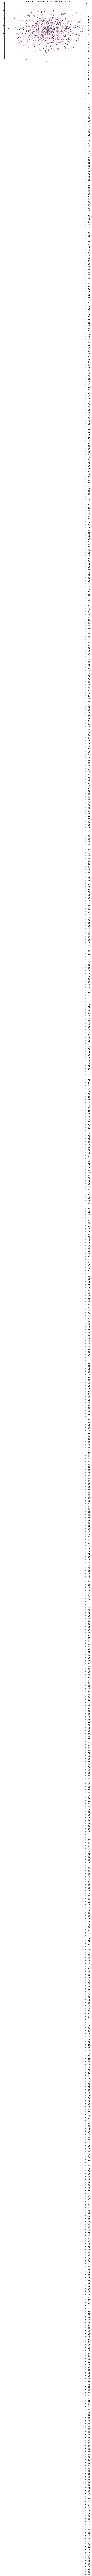

In [10]:
from sklearn.manifold import TSNE
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)

# word2vec word vectors
np_wv = np.array(wv)

# tfidf word vectors
tfidf_matrix = np.zeros((dictionary.num_docs, len(dictionary.keys())))
for i, row in enumerate(corpus_tfidf):
  for e in row:
    tfidf_matrix[i][e[0]] = e[1]

tsne_features = model.fit_transform(tfidf_matrix.transpose())
df = pd.DataFrame(tsne_features)
df['topic'] = tfidf_matrix.transpose().argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()

In [14]:
unseen_document = test[0]


print(' '.join(preprocess(unseen_document)))

bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

rf_scanner
warehouse_management systems let rf scanners ve year ve plenty experience_ve trained functions like complicated ones functions church trained rf_scanner moving slide cakey receiving items moving pallet slots inputting palette slot pixel lat initiative_learning new simple_fact try learn_new look think use future customer_service applications electronic_equipment rf scanners database distribution_center uses handle multitude functions sure base decisions learning_new use later life job home helping family_friends needs making_sure understand personal_experience sure worker customers_needs satisfied timely_manner following protocol topic asking_questions collect information said subject ll sure ask worker customer_needs collection information received customer worker ll_determine appropriate_action need order help worker customer ways_establish credibility trust customer ask_questions kind sort know little determining product need given time course depend know medical product k

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
